In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [4]:
# Configure logger
logging.basicConfig(
    filename="rossmann_eda.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

logging.info("Task 1: Exploration of customer purchasing behavior started.")

In [15]:
# Load datasets
try:
    train = pd.read_csv("../src/data/train.csv")
    store = pd.read_csv("../src/data/store.csv")
    logging.info("Datasets loaded successfully.")
except Exception as e:
    logging.error(f"Error loading datasets: {e}")
    raise

# Merge train and store datasets
try:
    train_store = pd.merge(train, store, on="Store", how="inner")
    logging.info("Datasets merged successfully.")
except Exception as e:
    logging.error(f"Error merging datasets: {e}")
    raise

C:\Users\Administrator.MMCY\AppData\Local\Temp\ipykernel_14740\1455095277.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../src/data/train.csv")


In [16]:
# Handle missing values (avoid using `inplace=True`)
logging.info("Handling missing values...")
train_store["CompetitionDistance"] = train_store["CompetitionDistance"].fillna(train_store["CompetitionDistance"].max())
train_store["CompetitionOpenSinceYear"] = train_store["CompetitionOpenSinceYear"].fillna(0)
train_store["CompetitionOpenSinceMonth"] = train_store["CompetitionOpenSinceMonth"].fillna(0)
train_store["Promo2SinceYear"] = train_store["Promo2SinceYear"].fillna(0)
train_store["Promo2SinceWeek"] = train_store["Promo2SinceWeek"].fillna(0)
train_store["PromoInterval"] = train_store["PromoInterval"].fillna("None")
logging.info("Missing values handled.")

In [17]:
# Convert Date column to datetime and extract new features
logging.info("Extracting features from Date column...")
train_store["Date"] = pd.to_datetime(train_store["Date"])
train_store["Year"] = train_store["Date"].dt.year
train_store["Month"] = train_store["Date"].dt.month
train_store["Day"] = train_store["Date"].dt.day
train_store["WeekOfYear"] = train_store["Date"].dt.isocalendar().week
train_store["DayOfWeek"] = train_store["Date"].dt.dayofweek
logging.info("Date features extracted.")

In [18]:
# Filter rows where stores are open
logging.info("Filtering rows where stores are open...")
train_store = train_store[train_store["Open"] == 1]

In [19]:
# Exploratory Data Analysis
logging.info("Starting Exploratory Data Analysis...")

In [20]:
print(train_store.columns)


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')


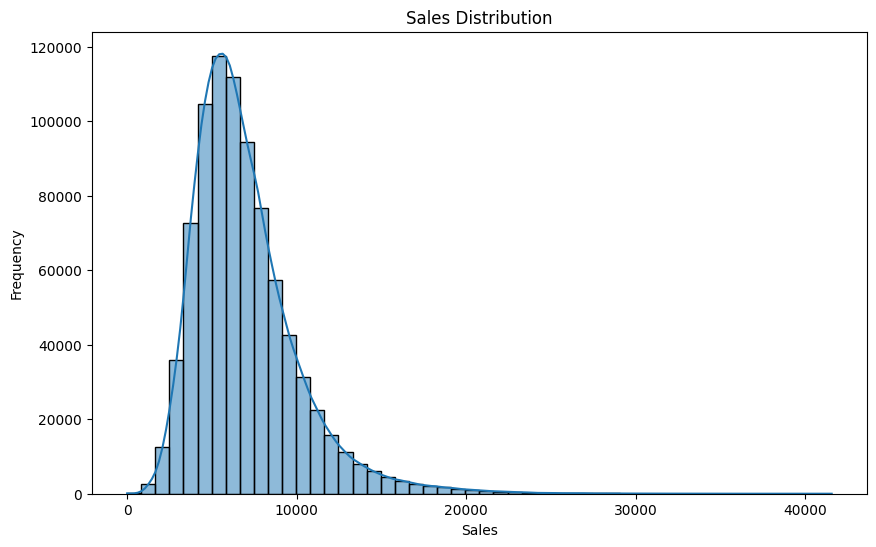

In [21]:
# 1. Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(train_store["Sales"], kde=True, bins=50)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.savefig("sales_distribution.png")
logging.info("Sales distribution plot saved.")